<a href="https://colab.research.google.com/github/GraciaKasereka/Calc-Levenshtein-Dist/blob/main/Growth_and_gdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
# prompt: get directory

import os
current_directory = os.getcwd()
print(current_directory)

/content


In [ ]:
#import the data
data= pd.read_csv('Data_Africa.csv')

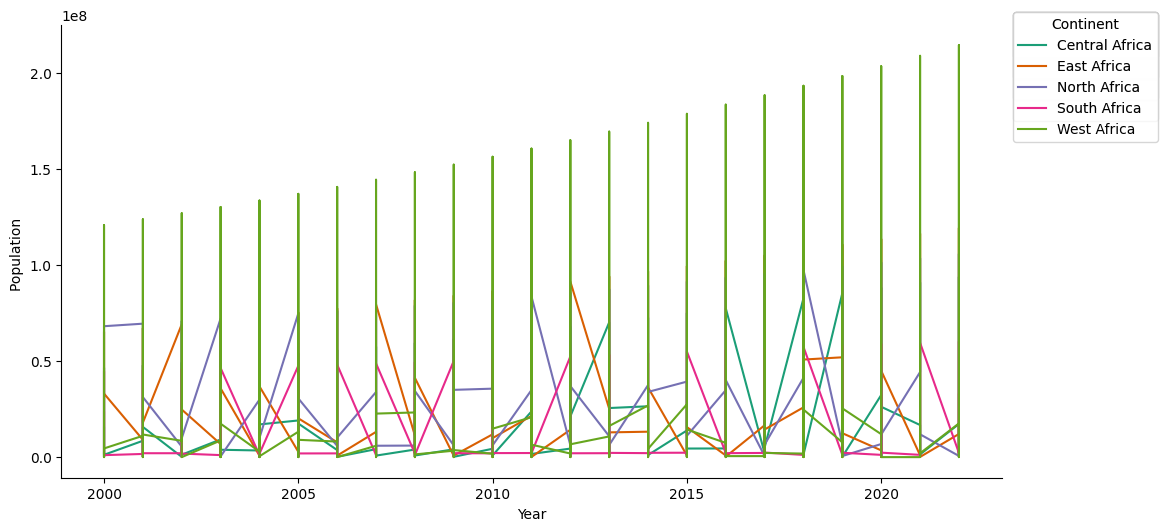

In [ ]:
# @title Year vs Population

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Population ']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Continent')):
  _plot_series(series, series_name, i)
  fig.legend(title='Continent', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Population ')

In [ ]:
#print the data
data

,ID,Year,Country,Continent,Population,GDP (USD)
0,1,2000,Uganda,East Africa,23303189,6.193247e+09
1,2,2001,Uganda,East Africa,24022603,5.840504e+09
2,3,2002,Uganda,East Africa,24781316,5.840504e+09
3,4,2003,Uganda,East Africa,25577246,6.606884e+09
4,5,2004,Uganda,East Africa,26403221,7.939488e+09
...,...,...,...,...,...,...
1329,1330,2018,Togo,West Africa,7794569,7.029218e+09
1330,1331,2019,Togo,West Africa,7986521,6.992656e+09
1331,1332,2020,Togo,West Africa,8181085,7.389329e+09
1332,1333,2021,Togo,West Africa,8399356,8.334047e+09


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Modèle ARIMA
model = ARIMA(data['Population '], order=(1, 1, 1))
model_fit = model.fit()

# Prédictions jusqu'à 2050
forecast = model_fit.forecast(steps=26)
print(forecast)

1334    9.126731e+06
1335    9.603238e+06
1336    1.005440e+07
1337    1.048155e+07
1338    1.088599e+07
1339    1.126891e+07
1340    1.163146e+07
1341    1.197472e+07
1342    1.229972e+07
1343    1.260743e+07
1344    1.289878e+07
1345    1.317462e+07
1346    1.343579e+07
1347    1.368307e+07
1348    1.391719e+07
1349    1.413885e+07
1350    1.434873e+07
1351    1.454744e+07
1352    1.473558e+07
1353    1.491371e+07
1354    1.508236e+07
1355    1.524205e+07
1356    1.539324e+07
1357    1.553638e+07
1358    1.567191e+07
1359    1.580023e+07
Name: predicted_mean, dtype: float64


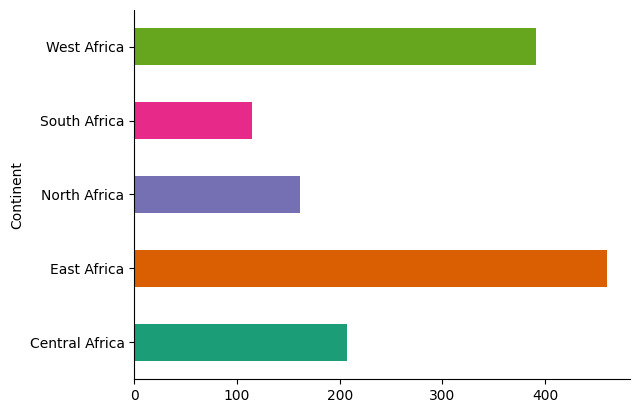

In [ ]:
# Continent

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Continent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)